In [315]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

In [316]:
df = pd.read_csv("data.csv", sep=";")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Preproccesing

In [317]:
for col_name in df.columns:
    print(col_name)
    print("Total NaN: ", df[col_name].isna().sum())
    print("Total Null: ", df[col_name].isnull().sum())
    print("Data type: ", df[col_name].dtype)
    print('+' * 10)

Marital status
Total NaN:  0
Total Null:  0
Data type:  int64
++++++++++
Application mode
Total NaN:  0
Total Null:  0
Data type:  int64
++++++++++
Application order
Total NaN:  0
Total Null:  0
Data type:  int64
++++++++++
Course
Total NaN:  0
Total Null:  0
Data type:  int64
++++++++++
Daytime/evening attendance	
Total NaN:  0
Total Null:  0
Data type:  int64
++++++++++
Previous qualification
Total NaN:  0
Total Null:  0
Data type:  int64
++++++++++
Previous qualification (grade)
Total NaN:  0
Total Null:  0
Data type:  float64
++++++++++
Nacionality
Total NaN:  0
Total Null:  0
Data type:  int64
++++++++++
Mother's qualification
Total NaN:  0
Total Null:  0
Data type:  int64
++++++++++
Father's qualification
Total NaN:  0
Total Null:  0
Data type:  int64
++++++++++
Mother's occupation
Total NaN:  0
Total Null:  0
Data type:  int64
++++++++++
Father's occupation
Total NaN:  0
Total Null:  0
Data type:  int64
++++++++++
Admission grade
Total NaN:  0
Total Null:  0
Data type:  float64


## Encode

In [318]:
def encode_target(value):
    if value == "Enroll" or value == "Dropout":
        return 0
    
    return 1

In [319]:
df["Target"] = df["Target"].apply(encode_target)

In [320]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


## Mapping course

In [321]:
courses = np.unique(df["Course"])

# Tạo ánh xạ từ giá trị cũ sang giá trị mới (1 đến len(courses))
mapping = {val: idx + 1 for idx, val in enumerate(np.sort(courses))}
df['Course'] = df['Course'].map(mapping)

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,2,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,11,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,15,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,3,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


# dong tuyen tinh

In [322]:
# fig = plt.figure(figsize=(15, 15))
# fig.set_figwidth(100)
# fig.set_figheight(100)
# plt.tick_params(labelrotation=45, labelsize=20)
# sns.pairplot(data=df)

In [323]:
df_float = df.select_dtypes(include=["float64"])

cov = np.zeros((len(df_float.columns[:-1]), len(df_float.columns[:-1])))

for i, col_name_i in enumerate(df_float.columns[:-1]):
    for j, col_name_j in enumerate(df_float.columns[:-1]):
            cov[i, j] = np.corrcoef(df_float[col_name_i].to_numpy(), df_float[col_name_j].to_numpy())[0, 1]

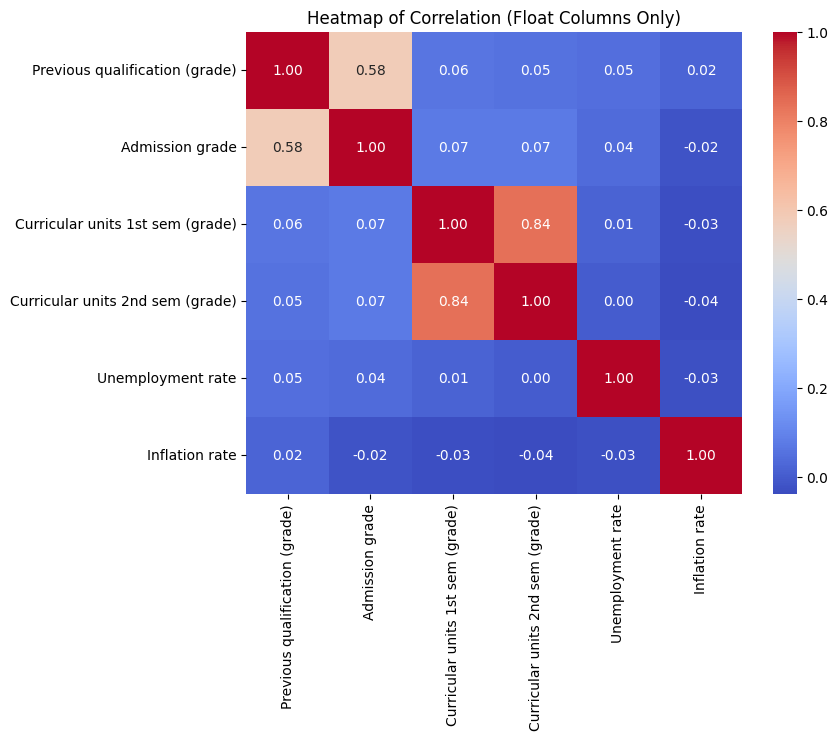

In [324]:
# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cov, xticklabels=df_float.columns[:-1], yticklabels=df_float.columns[:-1], annot=cov, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Correlation (Float Columns Only)")
plt.show()

ta thấy mối tương quan giữa curricular units 1st sem (grade) và curricular units 2st sem (grade) rất cao (=0.84) 

=> có thể loại bỏ 1 trong 2 

# Defining the input and output vector

In [325]:
X_y = df.to_numpy()

N = df.shape[0]
X_y_train, X_y_test = np.split(X_y, indices_or_sections=[int(0.8 * N)])

X_y_train.shape, X_y_test.shape

((3539, 37), (885, 37))

In [326]:
X_train, X_test = X_y_train[:, :-1], X_y_test[:, :-1]

X_train.shape, X_test.shape

((3539, 36), (885, 36))

In [327]:
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)


In [328]:
y_train, y_test = X_y_train[:, -1], X_y_test[:, -1]

y_train.shape, y_test.shape

((3539,), (885,))

In [329]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

y_train.shape, y_test.shape

((3539, 1), (885, 1))

# Model

In [330]:
from tqdm import tqdm

class LogisticRegression:
    def __init__(self, epoch, lr):
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []

    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def loss_fn(self, y, y_hat):
        y_hat = np.clip(y_hat, 1e-8, 1 - 1e-8)  # Tránh log(0)
        return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).mean()
    
    def accuracy(self, y, y_hat):
        return (1 - np.abs(y - y_hat)).mean()

    
    def fit(self, X, y):
        n = X.shape[0]
        d = X.shape[1]
        self.theta = np.zeros((d, 1))
        
        with tqdm(range(self.epoch)) as pb:  
            for e in pb: 
                #forward
                pb.set_description(f"Epoch {e + 1}")
                y_hat = self.predict(X)

                #backward
                diff = y_hat - y
                gradient = 1/n * np.matmul(X.T, diff) #(d, 1)
                self.theta -= self.lr * gradient

                #evaluating
                y_hat = self.predict(X)
                loss = self.loss_fn(y, y_hat)
                acc = self.accuracy(y, y_hat)
                
                pb.set_postfix({
                    "loss": loss,
                    "acc": acc
                })

                self.losses.append(loss)
                self.metrics.append(acc)


    def predict(self, X):
        z = np.matmul(X, self.theta) #(n, 1)
        y_hat = self.sigmoid(z) # (n, 1)
                
        return y_hat

In [331]:
logistic_reg = LogisticRegression(100, 0.01)

In [332]:
logistic_reg.fit(X_train, y_train)

Epoch 100: 100%|██████████| 100/100 [00:01<00:00, 63.93it/s, loss=0.527, acc=0.608]


# Visualizing loss

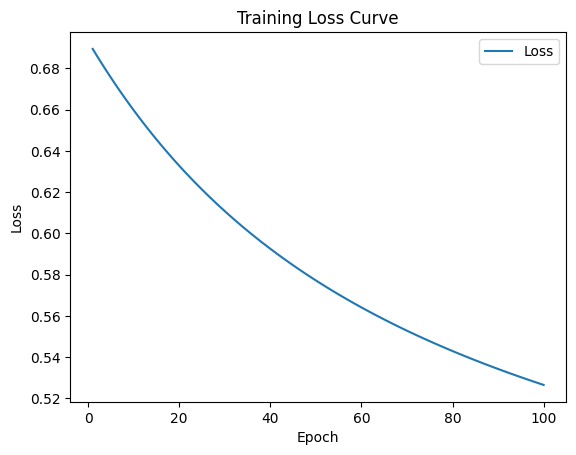

In [333]:
# Vẽ đồ thị Loss
plt.plot(range(1, len(logistic_reg.losses) + 1), logistic_reg.losses, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()